**Customer Churn Prediction**

In [178]:
# Data Preprocessing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Counting Library
from collections import Counter 

# Modelling Libraries

**Features in the Dataset**
1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn. 
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn. 
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior. 
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

In [179]:
df = pd.read_csv(r"../Capstone_Project/Customer-Churn.csv")
df1 = df.copy()
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory Data Analysis**

In [180]:
# Checks for number of rows and columns
df1.shape

(7043, 21)

In [181]:
# Check data for anomalies - Data type, missing values, number of features and rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- No missing values

In [182]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [184]:
# Check for null values
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- No null values

In [185]:
# Numerical Statistical Analysis
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [186]:
# Categorical Statistical Analysis
df1.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [187]:
# Check for duplicated values
df1[df1.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- No duplicates

In [188]:
# Data Features - Checks for columns
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [189]:
#df1.tenure.min()/max() # Group tenure by months
def group_tenure(x):
    if x <= 30:
        return "One month"
    elif x <= 60:
        return "Two months"
    else:
        return "Three months"
    
# Apply function to the data
df1["tenure_group"] = df1["tenure"].apply(group_tenure)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,One month
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Two months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,One month
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Two months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,One month


### Univariate Data Analysis

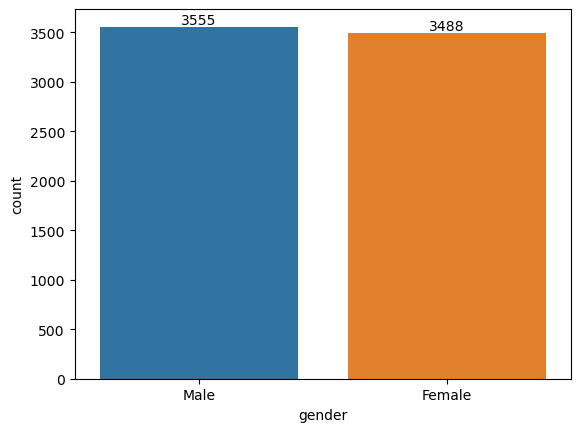

In [190]:
# Visualizing Gender

ax = sns.countplot(x=df1["gender"], order=df1["gender"].value_counts(ascending=False).index)
values = df1["gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# sns.countplot(x="gender", data=df1).set_title("Customers by Gender");

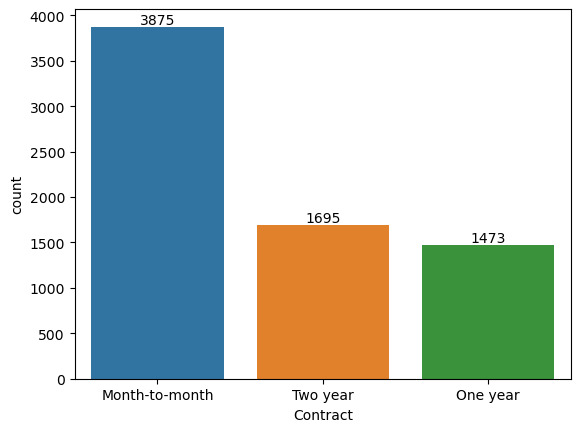

In [191]:
# Type of Contract
ax = sns.countplot(x=df1["Contract"], order=df1["Contract"].value_counts(ascending=False).index)
values = df1["Contract"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

**Observation**
- Most customers preferred Month-to-month contracts compared to Two year and One year contracts meaning there is no customer loyalty.

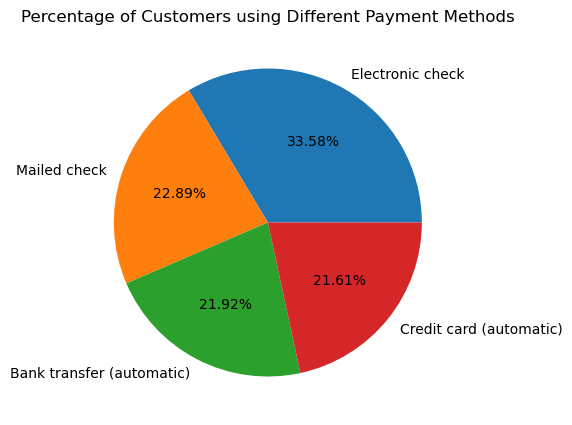

In [192]:
# Payment Methods
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df1["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers using Different Payment Methods")
plt.show();

**Observation**
- Electronic check was the most preferred payment method with 33.58% of customers using it.
- Mailed check was the second most preferred payment methods accounting for 22.89% of customer usage.
- Bank transfer (automatic) and Credit card (automatic) were the third and forth preferred payment methods accounting for 21.92% and 21.61% of customer population respectively.

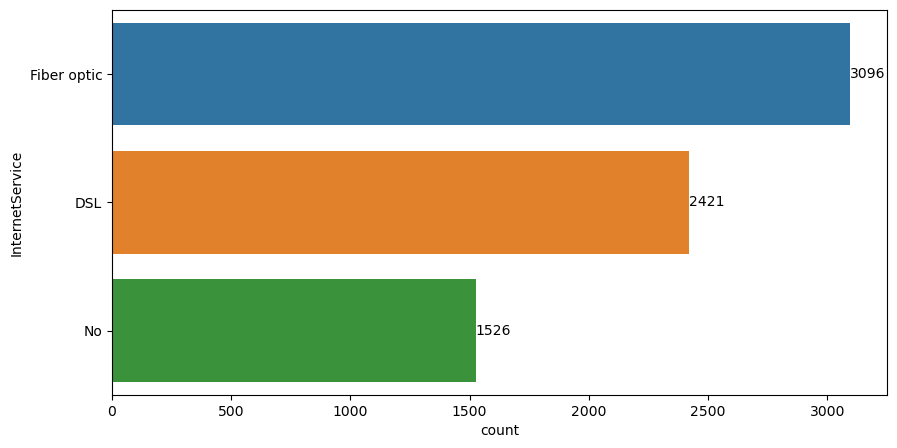

In [193]:
# Internet Service
plt.figure(figsize=(10,5))
intServ = sns.countplot(y=df1["InternetService"], order=df1["InternetService"].value_counts(ascending=False).index)
intServValues = df1["InternetService"].value_counts(ascending=False).values
intServ.bar_label(container=intServ.containers[0], labels=intServValues);

**Observation**
- Most customers preferred Fiber Optic compared to DSL internet service with each having 3096 and 2421 customers respectively.
- Additionally, 1526 customers did not consume internet.

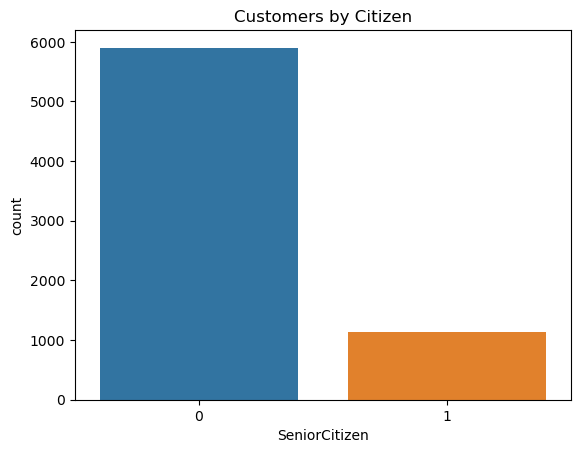

In [194]:
sns.countplot(x="SeniorCitizen", data=df1).set_title("Customers by Citizen");

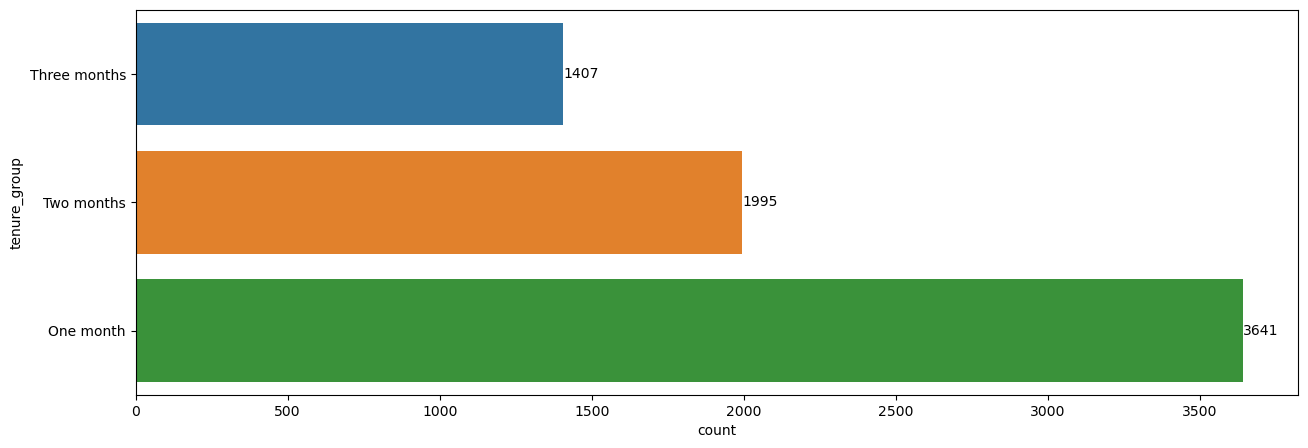

In [198]:
# Count Transactions by customer tenure
plt.figure(figsize=(15,5))
ag = sns.countplot(y=df1["tenure_group"], order=df1["tenure_group"].value_counts(ascending=True).index)
values = df1["tenure_group"].value_counts(ascending=True).values
ag.bar_label(container=ag.containers[0], labels=values);

**Observation**
- Most customers subscribes for 1 month telcom service compared to the other months. This means there is no customer loyalty.

### Multivariate Analysis

### Bivariate Analysis

KeyError: 'Customer'

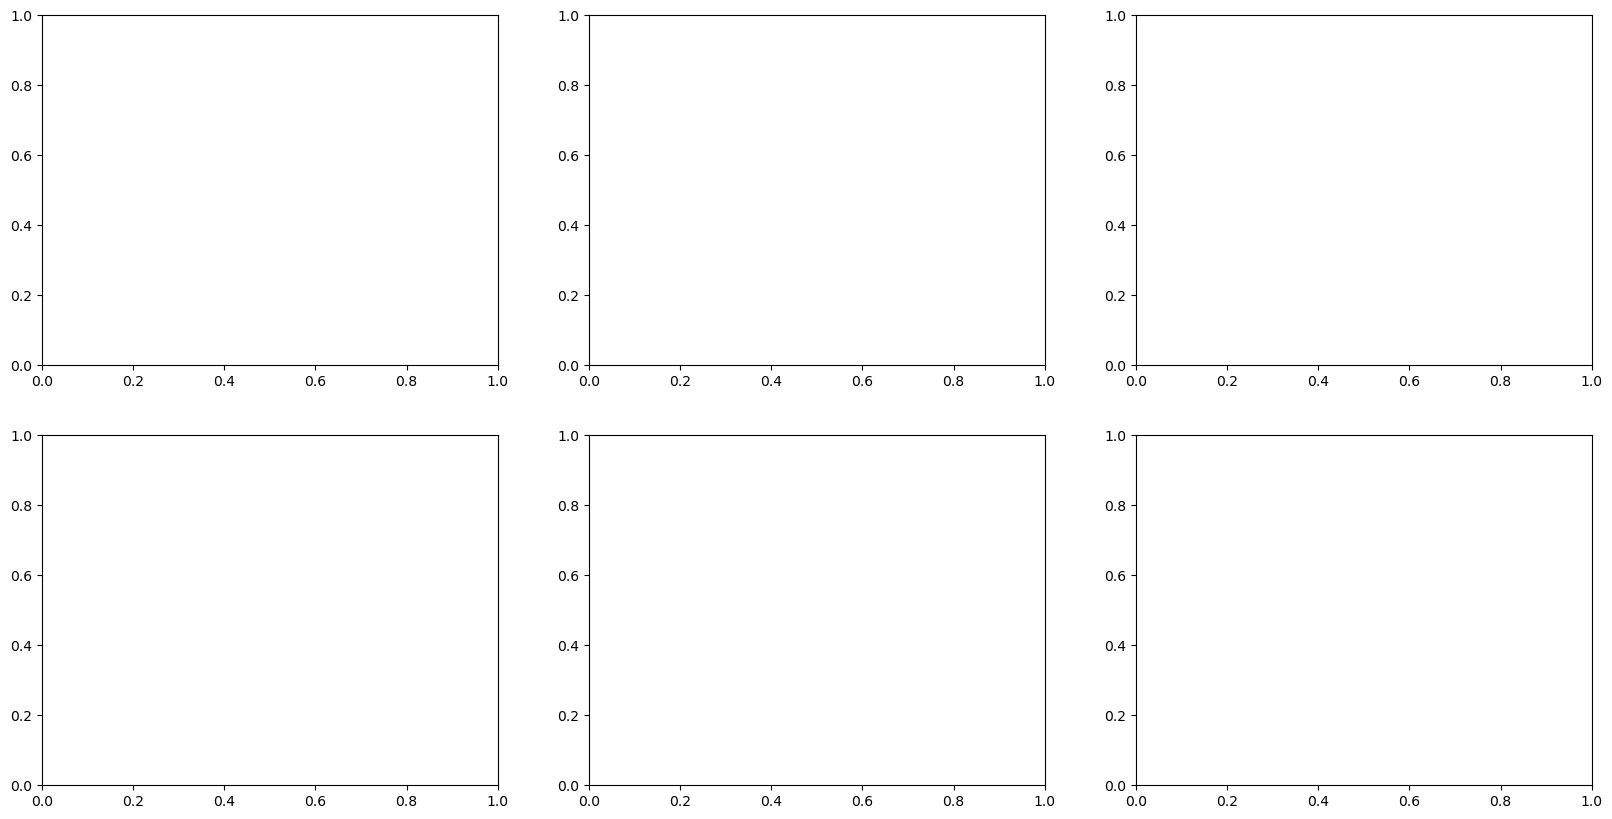

In [ ]:
# Customer
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

customer_profit = df.groupby("Customer")["Profit"].sum().reset_index()
sns.barplot(x="Customer", data=customer_profit, y="Profit", ax=axs[0,0])
axs[0,0].set_title("Total Profit by Customer Type");

sales_person_profit = df.groupby("Sales Person")["Profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sales_person_profit, y="Profit", ax=axs[0,1])
axs[0,1].set_title("Total Profit by Sales Person");

customer_age_group_profit = df.groupby("Age_Group")["Profit"].sum().reset_index()
sns.barplot(x="Age_Group", data=customer_age_group_profit, y="Profit", ax=axs[0,2])
axs[0,2].set_title("Total Profit by Customer Age Group");

prod_category_profit = df.groupby("Product_Category")["Profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=prod_category_profit, x="Profit", ax=axs[1,0])
axs[1,0].set_title("Total Profit by Product Category");

payment_opt_profit = df.groupby("Payment Option")["Profit"].sum().reset_index()
sns.barplot(y="Payment Option", data=payment_opt_profit, x="Profit", ax=axs[1,1])
axs[1,1].set_title("Total Profit by Payment Option");

sub_category_profit = df.groupby("Sub_Category")["Profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=sub_category_profit, x="Profit", ax=axs[1,2])
axs[1,2].set_title("Total Profit by Sub-Category");